In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Part 1: Processing data

In [2]:
df = pd.read_csv('TrainingData.csv')
df.head()

,LID,CHNL,SELLER,ORIGRATE,CURRRATE,ORIGUPB,CURRUPB,ORIGTERM,ORIGDATE,FSTPAY,...,NO_UNITS,OCCSTAT,STATE,MSA,ZIP,MIPCT,PRODUCT,IO,NMONTHS,FORCLOSED
0,389240861929,B,"Flagstar Bank, Fsb",6.750,6.750,113000.0,0.0,360,72001,92001,...,1,P,OH,19380,454,30.0,FRM,NaN,40,False
1,874875771135,C,"Bank Of America, N.A.",7.375,7.375,156000.0,0.0,360,62001,82001,...,1,P,FL,0,330,NaN,FRM,NaN,23,False
2,303998715891,R,Bishops Gate Residential Mortgage Trust,7.000,7.000,83000.0,0.0,360,62001,82001,...,1,P,ME,38860,40,NaN,FRM,NaN,22,False
3,949303781872,C,"Jpmorgan Chase Bank, Na",7.375,7.375,275000.0,0.0,360,32001,52001,...,1,P,NH,14460,38,NaN,FRM,NaN,14,False
4,378568113948,C,Other,6.875,6.875,203000.0,0.0,360,72001,92001,...,1,P,AZ,38060,850,12.0,FRM,NaN,16,False


In [3]:
df2 = pd.read_csv('TestDataYremoved.csv')
df2.head()

,LID,CHNL,SELLER,ORIGRATE,CURRRATE,ORIGUPB,CURRUPB,ORIGTERM,ORIGDATE,FSTPAY,...,PURPOSE,PROP,NO_UNITS,OCCSTAT,STATE,MSA,ZIP,MIPCT,PRODUCT,IO
0,492709308515,B,"Bank Of America, N.A.",7.000,7.000,176000.0,0.0,360,72001,82001,...,P,SF,1,P,KS,28140,660,30.0,FRM,NaN
1,687810129762,C,"Jpmorgan Chase Bank, Na",7.000,7.000,251000.0,0.0,360,62001,82001,...,P,SF,1,P,IL,16980,605,NaN,FRM,NaN
2,382328232416,R,"Bank Of America, N.A.",7.000,7.000,48000.0,0.0,180,62001,82001,...,R,SF,1,P,MO,17860,652,NaN,FRM,NaN
3,315002225730,R,"Jpmorgan Chase Bank, National Association",7.250,7.250,268000.0,0.0,360,62001,82001,...,P,SF,1,P,FL,45300,336,NaN,FRM,NaN
4,429983647228,R,Other,6.875,6.875,75000.0,0.0,180,82001,102001,...,P,PU,1,P,IN,26900,462,25.0,FRM,NaN


### Drop the ID feature

In [4]:
df.drop('LID', axis = 1, inplace=True)
df2.drop('LID', axis = 1, inplace=True)

### See how many unique entries for each feature in train set, and remove the entry with only one value


In [5]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col, df[col].unique())

CURRUPB [0.]
PRODUCT ['FRM']


In [6]:
#Drop the entry with only one value
df.drop(['CURRUPB','PRODUCT'], axis = 1, inplace=True)

In [7]:
#Drop the entry with only one value for testing 
df2.drop(['CURRUPB','PRODUCT'], axis = 1, inplace=True)

### Check for missing data

In [8]:
#Deal with miss predictive in train set
for col in df.columns:
    print(pd.isnull(df[col]).astype(int).value_counts())

0    588490
Name: CHNL, dtype: int64
0    588490
Name: SELLER, dtype: int64
0    588490
Name: ORIGRATE, dtype: int64
0    588490
Name: CURRRATE, dtype: int64
0    588490
Name: ORIGUPB, dtype: int64
0    588490
Name: ORIGTERM, dtype: int64
0    588490
Name: ORIGDATE, dtype: int64
0    588490
Name: FSTPAY, dtype: int64
0    588490
Name: LOANAGE, dtype: int64
0    588490
Name: REMMNTHS, dtype: int64
0    588490
Name: ADJRMTHS, dtype: int64
0    588490
Name: MATDT, dtype: int64
0    588490
Name: OLTV, dtype: int64
0    588476
1        14
Name: OCLTV, dtype: int64
0    587789
1       701
Name: NUMBO, dtype: int64
0    567427
1     21063
Name: DTI, dtype: int64
0    579558
1      8932
Name: CSCOREB, dtype: int64
1    310742
0    277748
Name: CSCOREC, dtype: int64
0    586492
1      1998
Name: FIRSTFLAG, dtype: int64
0    588490
Name: PURPOSE, dtype: int64
0    588490
Name: PROP, dtype: int64
0    588490
Name: NO_UNITS, dtype: int64
0    588490
Name: OCCSTAT, dtype: int64
0    588490
Name: ST

In [9]:
#Deal with miss predictive in test set
for col in df2.columns:
    print(pd.isna(df2[col]).astype(int).value_counts())

0    196164
Name: CHNL, dtype: int64
0    196164
Name: SELLER, dtype: int64
0    196164
Name: ORIGRATE, dtype: int64
0    196164
Name: CURRRATE, dtype: int64
0    196164
Name: ORIGUPB, dtype: int64
0    196164
Name: ORIGTERM, dtype: int64
0    196164
Name: ORIGDATE, dtype: int64
0    196164
Name: FSTPAY, dtype: int64
0    196164
Name: LOANAGE, dtype: int64
0    196164
Name: REMMNTHS, dtype: int64
0    196164
Name: ADJRMTHS, dtype: int64
0    196164
Name: MATDT, dtype: int64
0    196164
Name: OLTV, dtype: int64
0    196156
1         8
Name: OCLTV, dtype: int64
0    195916
1       248
Name: NUMBO, dtype: int64
0    189148
1      7016
Name: DTI, dtype: int64
0    193237
1      2927
Name: CSCOREB, dtype: int64
1    104072
0     92092
Name: CSCOREC, dtype: int64
0    195484
1       680
Name: FIRSTFLAG, dtype: int64
0    196164
Name: PURPOSE, dtype: int64
0    196164
Name: PROP, dtype: int64
0    196164
Name: NO_UNITS, dtype: int64
0    196164
Name: OCCSTAT, dtype: int64
0    196164
Name: ST

In [10]:
check_null = df.isnull().sum(axis = 0).sort_values(ascending = False)/len(df)
print(check_null[check_null > 0.15])
check_null2 = df2.isnull().sum(axis = 0).sort_values(ascending = False)/len(df)
print(check_null2[check_null2 > 0.15])

IO         0.926665
MIPCT      0.760558
CSCOREC    0.528033
dtype: float64
IO         0.308908
MIPCT      0.253630
CSCOREC    0.176846
dtype: float64


### Drop the features with too many missing values, for IO we fill the NaN

In [11]:
df['IO'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5      N
6    NaN
7    NaN
8    NaN
9    NaN
Name: IO, dtype: object

In [12]:
#Fill the NaN with Y because only N specified
df.loc[df["IO"].isna(),"IO"]="Y"
#Fill the NaN with Y because only N specified for testing
df2.loc[df2["IO"].isna(),"IO"]="Y"

In [13]:
# Drop the feature with too many missing values espacially for test
# Here MIPCT AND CSCOREC
df.drop(['MIPCT','CSCOREC'], axis = 1, inplace=True)


In [14]:
# Drop the feature with too many missing values espacially for test
# Here MIPCT AND CSCOREC
df2.drop(['MIPCT','CSCOREC'], axis = 1, inplace=True)


### Deal with missing data in categorical features and fill with mode

In [15]:
df["FIRSTFLAG"].value_counts()

N    539992
Y     46500
Name: FIRSTFLAG, dtype: int64

In [16]:
#Fill NA with mode
df.loc[df["FIRSTFLAG"].isna(),"FIRSTFLAG"]="N"

In [17]:
#Fill NA with mode for testing
df2.loc[df2["FIRSTFLAG"].isna(),"FIRSTFLAG"]="N"

### Deal with missing data in numerical features and fill with mean

In [18]:
#Fill the missing numerical value with mean 
df.loc[df["OCLTV"].isna(),"OCLTV"]=df["OCLTV"].mean().astype(int)
df.loc[df["NUMBO"].isna(),"NUMBO"]=df["NUMBO"].mean().astype(int)
df.loc[df["DTI"].isna(),"DTI"]=df["DTI"].mean().astype(int)
df.loc[df["CSCOREB"].isna(),"CSCOREB"]=df["CSCOREB"].mean().astype(int)

In [19]:
#Fill the missing numerical value with mean for testing
df2.loc[df2["OCLTV"].isna(),"OCLTV"]=df2["OCLTV"].mean().astype(int)
df2.loc[df2["NUMBO"].isna(),"NUMBO"]=df2["NUMBO"].mean().astype(int)
df2.loc[df2["DTI"].isna(),"DTI"]=df2["DTI"].mean().astype(int)
df2.loc[df2["CSCOREB"].isna(),"CSCOREB"]=df2["CSCOREB"].mean().astype(int)

### Check missing for data now

In [20]:
for col in df.columns:
    print(pd.isnull(df[col]).astype(int).value_counts())
for col in df2.columns:
    print(pd.isnull(df2[col]).astype(int).value_counts())

0    588490
Name: CHNL, dtype: int64
0    588490
Name: SELLER, dtype: int64
0    588490
Name: ORIGRATE, dtype: int64
0    588490
Name: CURRRATE, dtype: int64
0    588490
Name: ORIGUPB, dtype: int64
0    588490
Name: ORIGTERM, dtype: int64
0    588490
Name: ORIGDATE, dtype: int64
0    588490
Name: FSTPAY, dtype: int64
0    588490
Name: LOANAGE, dtype: int64
0    588490
Name: REMMNTHS, dtype: int64
0    588490
Name: ADJRMTHS, dtype: int64
0    588490
Name: MATDT, dtype: int64
0    588490
Name: OLTV, dtype: int64
0    588490
Name: OCLTV, dtype: int64
0    588490
Name: NUMBO, dtype: int64
0    588490
Name: DTI, dtype: int64
0    588490
Name: CSCOREB, dtype: int64
0    588490
Name: FIRSTFLAG, dtype: int64
0    588490
Name: PURPOSE, dtype: int64
0    588490
Name: PROP, dtype: int64
0    588490
Name: NO_UNITS, dtype: int64
0    588490
Name: OCCSTAT, dtype: int64
0    588490
Name: STATE, dtype: int64
0    588490
Name: MSA, dtype: int64
0    588490
Name: ZIP, dtype: int64
0    588490
Name: IO, 

### Check for correlation between predictors and NMONTHS

In [21]:
corr = df.corr()
corr_NMONTHS = corr.NMONTHS
buffer = corr_NMONTHS[np.abs(corr_NMONTHS) < 0.05]
corr_drop = buffer[(corr_NMONTHS) > 0.95]
print(buffer)
print(corr_drop)

ORIGDATE    0.009359
FSTPAY      0.012411
LOANAGE    -0.011245
MATDT       0.011434
OLTV       -0.047942
DTI        -0.043664
CSCOREB    -0.037949
NO_UNITS    0.021964
Name: NMONTHS, dtype: float64
Series([], Name: NMONTHS, dtype: float64)


### Drop the low correlation features for NMONTHS

In [22]:
df_nm = df.drop(['ORIGDATE','FSTPAY','LOANAGE','MATDT','OLTV','DTI','CSCOREB','NO_UNITS'], axis = 1)
df2_nm = df2.drop(['ORIGDATE','FSTPAY','LOANAGE','MATDT','OLTV','DTI','CSCOREB','NO_UNITS'], axis = 1)

### Check for correlation between predictors and FORCLOSED

In [23]:
corr = df.corr()
corr_FORCLOSED = corr.FORCLOSED
buffer = corr_FORCLOSED[np.abs(corr_FORCLOSED) < 0.05]
corr_drop = buffer[(corr_FORCLOSED) > 0.95]
print(buffer)
print(corr_drop)

ORIGTERM    0.031957
ORIGDATE    0.004845
FSTPAY      0.002715
LOANAGE     0.000731
REMMNTHS    0.031957
ADJRMTHS    0.032275
MATDT       0.002885
DTI         0.017244
NO_UNITS    0.001879
MSA        -0.039244
ZIP        -0.013894
Name: FORCLOSED, dtype: float64
Series([], Name: FORCLOSED, dtype: float64)


### Drop the low correlation features for FORCLOSED

In [24]:
df_fc = df.drop(['ORIGTERM','REMMNTHS','ADJRMTHS','MSA','ZIP'], axis = 1)
df2_fc = df2.drop(['ORIGTERM','REMMNTHS','ADJRMTHS','MSA','ZIP'], axis = 1)
df_fc.head()

,CHNL,SELLER,ORIGRATE,CURRRATE,ORIGUPB,ORIGDATE,FSTPAY,LOANAGE,MATDT,OLTV,...,CSCOREB,FIRSTFLAG,PURPOSE,PROP,NO_UNITS,OCCSTAT,STATE,IO,NMONTHS,FORCLOSED
0,B,"Flagstar Bank, Fsb",6.750,6.750,113000.0,72001,92001,1,82031,95,...,804.0,N,P,CO,1,P,OH,Y,40,False
1,C,"Bank Of America, N.A.",7.375,7.375,156000.0,62001,82001,0,72031,59,...,770.0,N,C,SF,1,P,FL,Y,23,False
2,R,Bishops Gate Residential Mortgage Trust,7.000,7.000,83000.0,62001,82001,0,72031,79,...,560.0,N,R,CO,1,P,ME,Y,22,False
3,C,"Jpmorgan Chase Bank, Na",7.375,7.375,275000.0,32001,52001,4,42031,74,...,659.0,N,R,SF,1,P,NH,Y,14,False
4,C,Other,6.875,6.875,203000.0,72001,92001,1,82031,83,...,753.0,N,R,SF,1,P,AZ,Y,16,False


### Convert the categorical variables to dummy variable for NMONTHS

In [25]:
CHNL_nm = pd.get_dummies(df_nm["CHNL"], drop_first = True, prefix = "CHNL")
SELLER_nm = pd.get_dummies(df_nm["SELLER"], drop_first = True, prefix = "SELLER")
FIRSTFLAG_nm = pd.get_dummies(df_nm["FIRSTFLAG"], drop_first = True, prefix = "FIRSTFLAG")
PURPOSE_nm = pd.get_dummies(df_nm["PURPOSE"], drop_first = True, prefix = "PURPOSE")
PROP_nm = pd.get_dummies(df_nm["PROP"], drop_first = True, prefix = "PROP")
OCCSTAT_nm = pd.get_dummies(df_nm["OCCSTAT"], drop_first = True, prefix = "OCCSTAT")
STATE_nm = pd.get_dummies(df_nm["STATE"], drop_first = True, prefix = "STATE")
IO_nm = pd.get_dummies(df_nm["IO"], drop_first = True, prefix = "IO")

In [26]:
buffer = pd.concat([df_nm, CHNL_nm, SELLER_nm, FIRSTFLAG_nm, PURPOSE_nm, PROP_nm, OCCSTAT_nm, STATE_nm, IO_nm], axis = 1)
df_nm = buffer.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'STATE','IO'], axis = 1)
df_nm = df_nm.drop(['ZIP'], axis = 1)
df_nm.head()

,ORIGRATE,CURRRATE,ORIGUPB,ORIGTERM,REMMNTHS,ADJRMTHS,OCLTV,NUMBO,MSA,NMONTHS,...,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,IO_Y
0,6.750,6.750,113000.0,360,359,359,95.0,2.0,19380,40,...,0,0,0,0,0,0,0,0,0,1
1,7.375,7.375,156000.0,360,360,359,59.0,2.0,0,23,...,0,0,0,0,0,0,0,0,0,1
2,7.000,7.000,83000.0,360,360,359,79.0,2.0,38860,22,...,0,0,0,0,0,0,0,0,0,1
3,7.375,7.375,275000.0,360,356,355,74.0,2.0,14460,14,...,0,0,0,0,0,0,0,0,0,1
4,6.875,6.875,203000.0,360,359,359,83.0,2.0,38060,16,...,0,0,0,0,0,0,0,0,0,1


In [27]:
CHNL_nm2 = pd.get_dummies(df2_nm["CHNL"], drop_first = True, prefix = "CHNL")
SELLER_nm2 = pd.get_dummies(df2_nm["SELLER"], drop_first = True, prefix = "SELLER")
FIRSTFLAG_nm2 = pd.get_dummies(df2_nm["FIRSTFLAG"], drop_first = True, prefix = "FIRSTFLAG")
PURPOSE_nm2 = pd.get_dummies(df2_nm["PURPOSE"], drop_first = True, prefix = "PURPOSE")
PROP_nm2 = pd.get_dummies(df2_nm["PROP"], drop_first = True, prefix = "PROP")
OCCSTAT_nm2 = pd.get_dummies(df2_nm["OCCSTAT"], drop_first = True, prefix = "OCCSTAT")
STATE_nm2 = pd.get_dummies(df2_nm["STATE"], drop_first = True, prefix = "STATE")
IO_nm2 = pd.get_dummies(df2_nm["IO"], drop_first = True, prefix = "IO")

In [28]:
buffer = pd.concat([df2_nm, CHNL_nm2, SELLER_nm2, FIRSTFLAG_nm2, PURPOSE_nm2, PROP_nm2, OCCSTAT_nm2, STATE_nm2, IO_nm2], axis = 1)
df2_nm = buffer.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'STATE','IO'], axis = 1)
df2_nm = df2_nm.drop(['ZIP'], axis = 1)
df2_nm.head()

,ORIGRATE,CURRRATE,ORIGUPB,ORIGTERM,REMMNTHS,ADJRMTHS,OCLTV,NUMBO,MSA,CHNL_C,...,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,IO_Y
0,7.000,7.000,176000.0,360,360,360,95.0,2.0,28140,0,...,0,0,0,0,0,0,0,0,0,1
1,7.000,7.000,251000.0,360,359,359,80.0,2.0,16980,1,...,0,0,0,0,0,0,0,0,0,1
2,7.000,7.000,48000.0,180,180,180,80.0,2.0,17860,0,...,0,0,0,0,0,0,0,0,0,1
3,7.250,7.250,268000.0,360,359,359,80.0,1.0,45300,0,...,0,0,0,0,0,0,0,0,0,1
4,6.875,6.875,75000.0,180,180,180,95.0,1.0,26900,0,...,0,0,0,0,0,0,0,0,0,1


### Convert the categorical variables to dummy variable for FORCLOSED

In [29]:
CHNL_fc = pd.get_dummies(df_fc["CHNL"], drop_first = True, prefix = "CHNL")
SELLER_fc = pd.get_dummies(df_fc["SELLER"], drop_first = True, prefix = "SELLER")
FIRSTFLAG_fc = pd.get_dummies(df_fc["FIRSTFLAG"], drop_first = True, prefix = "FIRSTFLAG")
PURPOSE_fc = pd.get_dummies(df_fc["PURPOSE"], drop_first = True, prefix = "PURPOSE")
PROP_fc = pd.get_dummies(df_fc["PROP"], drop_first = True, prefix = "PROP")
OCCSTAT_fc = pd.get_dummies(df_fc["OCCSTAT"], drop_first = True, prefix = "OCCSTAT")
STATE_fc = pd.get_dummies(df_fc["STATE"], drop_first = True, prefix = "STATE")
IO_fc = pd.get_dummies(df_fc["IO"], drop_first = True, prefix = "IO")

In [30]:
buffer = pd.concat([df_fc, CHNL_fc, SELLER_fc, FIRSTFLAG_fc, PURPOSE_fc, PROP_fc, OCCSTAT_fc, STATE_fc,IO_fc], axis = 1)
df_fc = buffer.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'STATE','IO'], axis = 1)
df_fc.head()

,ORIGRATE,CURRRATE,ORIGUPB,ORIGDATE,FSTPAY,LOANAGE,MATDT,OLTV,OCLTV,NUMBO,...,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,IO_Y
0,6.750,6.750,113000.0,72001,92001,1,82031,95,95.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,7.375,7.375,156000.0,62001,82001,0,72031,59,59.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,7.000,7.000,83000.0,62001,82001,0,72031,79,79.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,7.375,7.375,275000.0,32001,52001,4,42031,74,74.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,6.875,6.875,203000.0,72001,92001,1,82031,83,83.0,2.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
CHNL_fc2 = pd.get_dummies(df2_fc["CHNL"], drop_first = True, prefix = "CHNL")
SELLER_fc2 = pd.get_dummies(df2_fc["SELLER"], drop_first = True, prefix = "SELLER")
FIRSTFLAG_fc2 = pd.get_dummies(df2_fc["FIRSTFLAG"], drop_first = True, prefix = "FIRSTFLAG")
PURPOSE_fc2 = pd.get_dummies(df2_fc["PURPOSE"], drop_first = True, prefix = "PURPOSE")
PROP_fc2 = pd.get_dummies(df2_fc["PROP"], drop_first = True, prefix = "PROP")
OCCSTAT_fc2 = pd.get_dummies(df2_fc["OCCSTAT"], drop_first = True, prefix = "OCCSTAT")
STATE_fc2 = pd.get_dummies(df2_fc["STATE"], drop_first = True, prefix = "STATE")
IO_fc2 = pd.get_dummies(df2_fc["IO"], drop_first = True, prefix = "IO")

In [32]:
buffer = pd.concat([df2_fc, CHNL_fc2, SELLER_fc2, FIRSTFLAG_fc2, PURPOSE_fc2, PROP_fc2, OCCSTAT_fc2, STATE_fc2,IO_fc2], axis = 1)
df2_fc = buffer.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'STATE','IO'], axis = 1)
df2_fc.head()

,ORIGRATE,CURRRATE,ORIGUPB,ORIGDATE,FSTPAY,LOANAGE,MATDT,OLTV,OCLTV,NUMBO,...,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,IO_Y
0,7.000,7.000,176000.0,72001,82001,0,72031,95,95.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,7.000,7.000,251000.0,62001,82001,1,72031,80,80.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,7.000,7.000,48000.0,62001,82001,0,72016,80,80.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,7.250,7.250,268000.0,62001,82001,1,72031,80,80.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,6.875,6.875,75000.0,82001,102001,0,92016,95,95.0,1.0,...,0,0,0,0,0,0,0,0,0,1


## Part 2: Fitting model

### 2.a NMONTHS models

In [33]:
xnm = df_nm.drop(['NMONTHS', 'FORCLOSED'], axis = 1)
ynm = df_nm['NMONTHS']

In [34]:
from sklearn.model_selection import train_test_split
xnmtr,xnmts,ynmtr,ynmts = train_test_split(xnm, ynm, train_size = .75, shuffle = False)

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
nmlr = LinearRegression().fit(xnmtr, ynmtr)
ynmlred = nmlr.predict(xnmts)

In [36]:
mad_nmlr = sum(abs(ynmlred - ynmts))/len(ynmts)
mad_nmlr

12.444721975556526

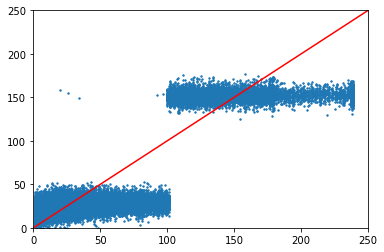

In [37]:
%matplotlib inline
lineStart = 0
lineEnd = 250

plt.scatter(ynmts, ynmlred, s = 2)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], "k-", color = "r")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [38]:
from sklearn.metrics import r2_score
r2lr = r2_score(ynmts, ynmlred)
r2lr

0.7647509973051492

The MAD and R2 are above

### Ridge Regression

In [39]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import r2_score

#Checking different alphas for fitting
alphas = [0.001,0.01,0.1,1,10,100,1000]
#Cross validation in ridge regression
ridge_cv = RidgeCV(alphas = alphas, normalize=True, scoring='neg_mean_squared_error', cv = 10)
ridge_cv.fit(xnmtr, ynmtr)
#Get the best Alpha for model
nmrr = Ridge(alpha = ridge_cv.alpha_, normalize=True)
nmrr.fit(xnmtr, ynmtr)
ynmrred = nmrr.predict(xnmts)
#Calculate MAD
mad_nmrr = sum(abs(ynmrred - ynmts))/len(ynmts)
print(mad_nmrr)
#Calculate R2
r2rr = r2_score(ynmts, ynmrred)
print(r2rr)

12.446124459145116
0.764737956537393


The MAD and R2 are above

### LASSO

In [40]:
from sklearn.linear_model import Lasso,LassoCV
#Checking different alphas for fitting
alphas = [0.001,0.01,0.1,1,10,100,1000]
#Cross validation in lasso regression
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(xnmtr, ynmtr)
#Get the best Alpha for model
nmla = Lasso(alpha = lasso_cv.alpha_, normalize=True, max_iter=10000)
nmla.fit(xnmtr, ynmtr)
#Calculate MAD
ynmlaed = nmla.predict(xnmts)
mad_nmla = sum(abs(ynmlaed - ynmts))/len(ynmts)
print(mad_nmla)
# Calculate R2_score
r2la = r2_score(ynmts, ynmlaed)
print(r2la)

12.684780732557618
0.7581779725162698


The MAD and R2 are above

From the NMONTHS model, since our objective is to choose the best MAD which is the lowest, so choose linear regression as our best model

### 2.b FORCLOSED models

In [41]:
xfc = df_fc.drop(['NMONTHS', 'FORCLOSED'], axis = 1)
yfc = df_fc["FORCLOSED"]
xfctr,xfcts,yfctr,yfcts = train_test_split(xfc, yfc, train_size = .75, shuffle = False)

Since the FORCLOSED variable has imbalanced value entry so we need to undersample to deal with this issue

In [42]:
from imblearn.under_sampling import RandomUnderSampler 
undersample = RandomUnderSampler(sampling_strategy = .75, random_state = 10)
xfctr2, yfctr2 = undersample.fit_sample(xfctr, yfctr)

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
fxlr = LogisticRegression().fit(xfctr2, yfctr2)
fclred = fxlr.predict(xfcts)

In [44]:
# Draw confusion mitrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yfcts, fclred, labels = [1,0])
cm

array([[  1028,    448],
       [ 31694, 113953]], dtype=int64)

In [45]:
# fpr tpr
fpr = 488/(488+1028)
print("fpr")
print(fpr)

tpr = 113953/(31694 +113953)
print("tpr")
print(tpr)

fpr
0.32189973614775724
tpr
0.7823916730176386


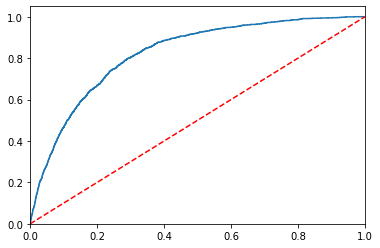

In [46]:
#ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(yfcts, fxlr.predict_proba(xfcts)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

### Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
fxgnb = GaussianNB().fit(xfctr2, yfctr2)
fcgnbed = fxgnb.predict(xfcts)

In [48]:
# Draw confusion mitrix
cm = confusion_matrix(yfcts, fcgnbed, labels = [1,0])
cm

array([[ 1194,   282],
       [49068, 96579]], dtype=int64)

In [49]:
# fpr tpr
fpr = 282/(282+1194)
print("fpr")
print(fpr)

tpr = 96579/(96579 +49068)
print("tpr")
print(tpr)

fpr
0.1910569105691057
tpr
0.6631032565037385


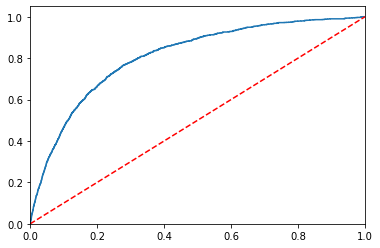

In [50]:
fpr, tpr, threshold = roc_curve(yfcts, fxgnb.predict_proba(xfcts)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

###  Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
fxdt = DecisionTreeClassifier().fit(xfctr2, yfctr2)
fcdted = fxdt.predict(xfcts)

In [52]:
# Draw confusion mitrix
cm = confusion_matrix(yfcts, fcdted, labels = [1,0])
cm

array([[  1031,    445],
       [ 33410, 112237]], dtype=int64)

In [53]:
# fpr tpr
fpr = 426/(426+1050)
print("fpr")
print(fpr)

tpr = 112141/(33506 +112141)
print("tpr")
print(tpr)

fpr
0.2886178861788618
tpr
0.7699506340672997


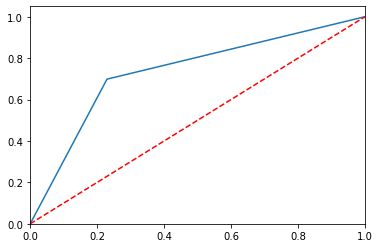

In [54]:
fpr, tpr, threshold = roc_curve(yfcts, fxdt.predict_proba(xfcts)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Since we need TPR - FPR as large as possible, so we choose Decision Tree

### Prediction

In [55]:
out1 = nmlr.predict(df2_nm)
out1

array([22.42639809, 13.36050811, 28.25296232, ..., 15.04321262,
       25.03995264, 22.98811175])

In [56]:
out2 = fxdt.predict(df2_fc)
out2

array([False, False,  True, ..., False, False,  True])

In [57]:
getID = pd.read_csv('TestDataYremoved.csv')

output = pd.DataFrame({'LID': getID['LID'], 'NMONTHS':out1, 'FORCLOSED':out2})
output.to_csv("result.csv")